In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import configparser

In [242]:
config = configparser.ConfigParser()
config.read('../build/src/advection.ini')


nIter = int(config['run']['maxIter'])
dt    = float(config['discretization']['dt'])
dVx   = float(config['discretization']['dVx'])
minX  = float(config['discretization']['minRealx'])
maxX  = float(config['discretization']['maxRealx'])
minVx = float(config['discretization']['minRealVx'])

df = pd.read_csv("../build/src/solution.log", sep=",", header=None)

dx = (maxX - minX) / len(df.columns)

print(f"\
nIter : {nIter}\n\
dt    : {dt}\n\
dx    : {dx}\n\
dVx   : {dVx}\n\
minX  : {minX}\n\
maxX  : {maxX}\n\
minVx : {minVx}")

df

nIter : 1
dt    : 0.5
dx    : 0.3125
dVx   : 3.141592654
minX  : -10.0
maxX  : 10.0
minVx : 0.0


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.544021,0.259710,-0.049757,-0.354405,-0.624724,-0.834529,-0.963499,-0.999140,-0.938000,-0.786002,...,0.557868,0.786002,0.938000,0.99914,0.963499,0.834529,0.624724,0.354405,0.049757,-0.259710
1,0.544025,0.775639,0.932121,0.998314,0.967807,0.843553,0.637595,0.369793,0.071173,-0.275744,...,-0.557872,-0.786005,-0.938002,-0.99914,-0.963497,-0.834527,-0.624720,-0.354401,-0.049753,0.259715
2,-0.544028,-0.775641,-0.932122,-0.998314,-0.967805,-0.843551,-0.637587,-0.369863,-0.066313,0.243660,...,0.557875,0.786007,0.938003,0.99914,0.963496,0.834524,0.624717,0.354397,0.049749,-0.259719


Vx[0] = 0.0


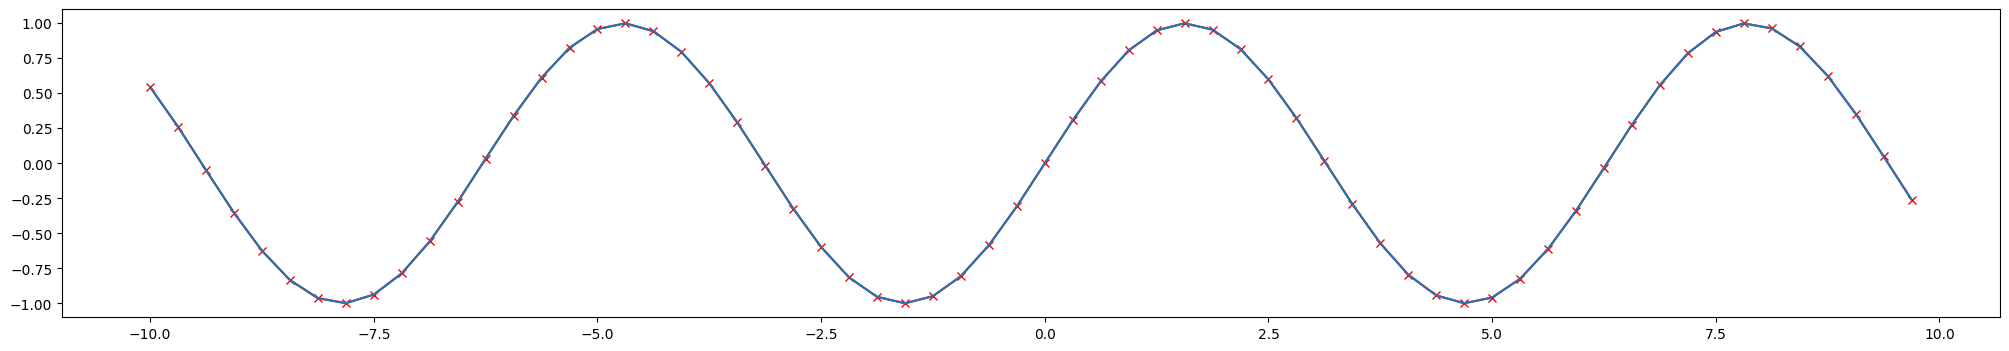

Vx[1] = 3.141592654


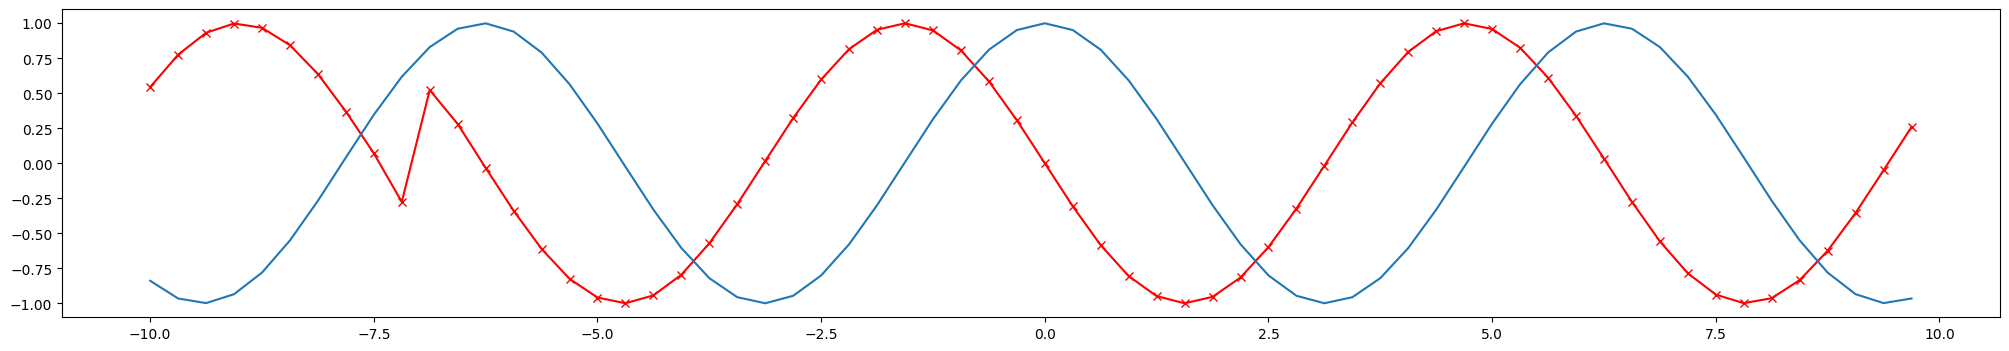

Vx[2] = 6.283185308


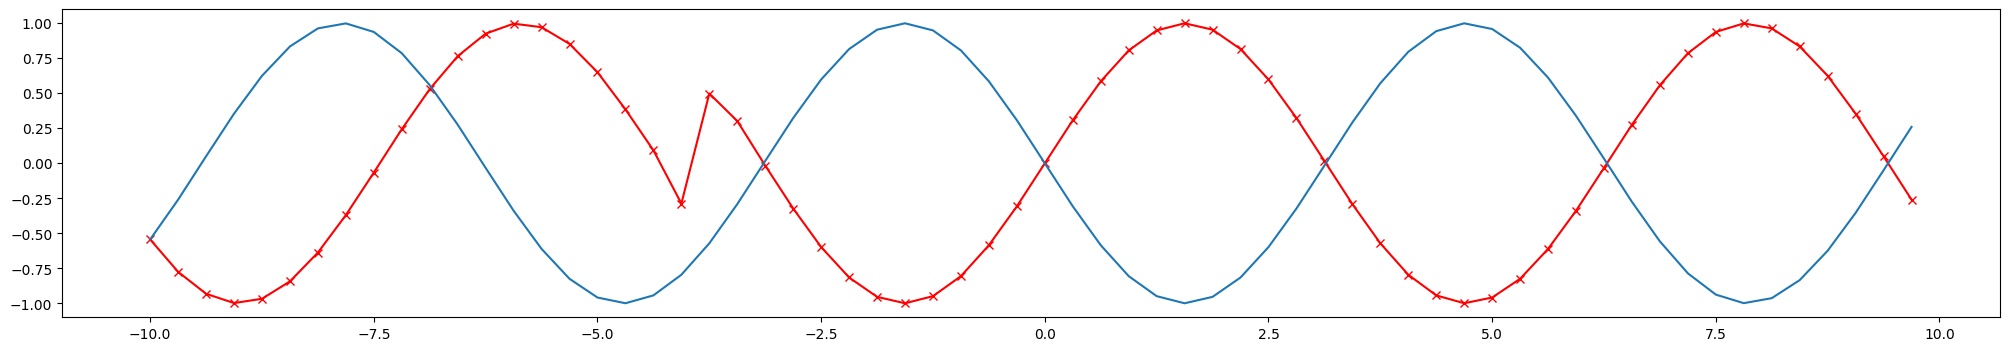

In [243]:

t = nIter*dt
x = np.arange(minX, maxX, step=dx)

for iloc in range(len(df)):
    currV = minVx + iloc * dVx
    print(f"Vx[{iloc}] = {currV}")

    plt.figure(figsize=(25,4))
    y = df.iloc[iloc]
    plt.plot(x, y, '-rx') #plot numerical approximation
    plt.plot(x, np.sin(x + t*currV)) #plot the exact solution for this Vx
    plt.show()

